# 可重复

**[LeetCode Link](https://leetcode-cn.com/problems/combination-sum/solution/hui-su-suan-fa-jian-zhi-python-dai-ma-java-dai-m-2/)**

## 回溯+剪枝
### 思路：根据示例 1：输入: candidates = [2,3,6,7]，target = 7。
* 候选数组里有2，如果找到了7-2=5的所有组合，再在之前加上2，就是7的所有组合；
* 同理考虑3，如果找到了7-3=4的所有组合，再在之前加上3，就是7的所有组合，依次这样找下去；
* 上面的思路就可以画成下面的树形图。
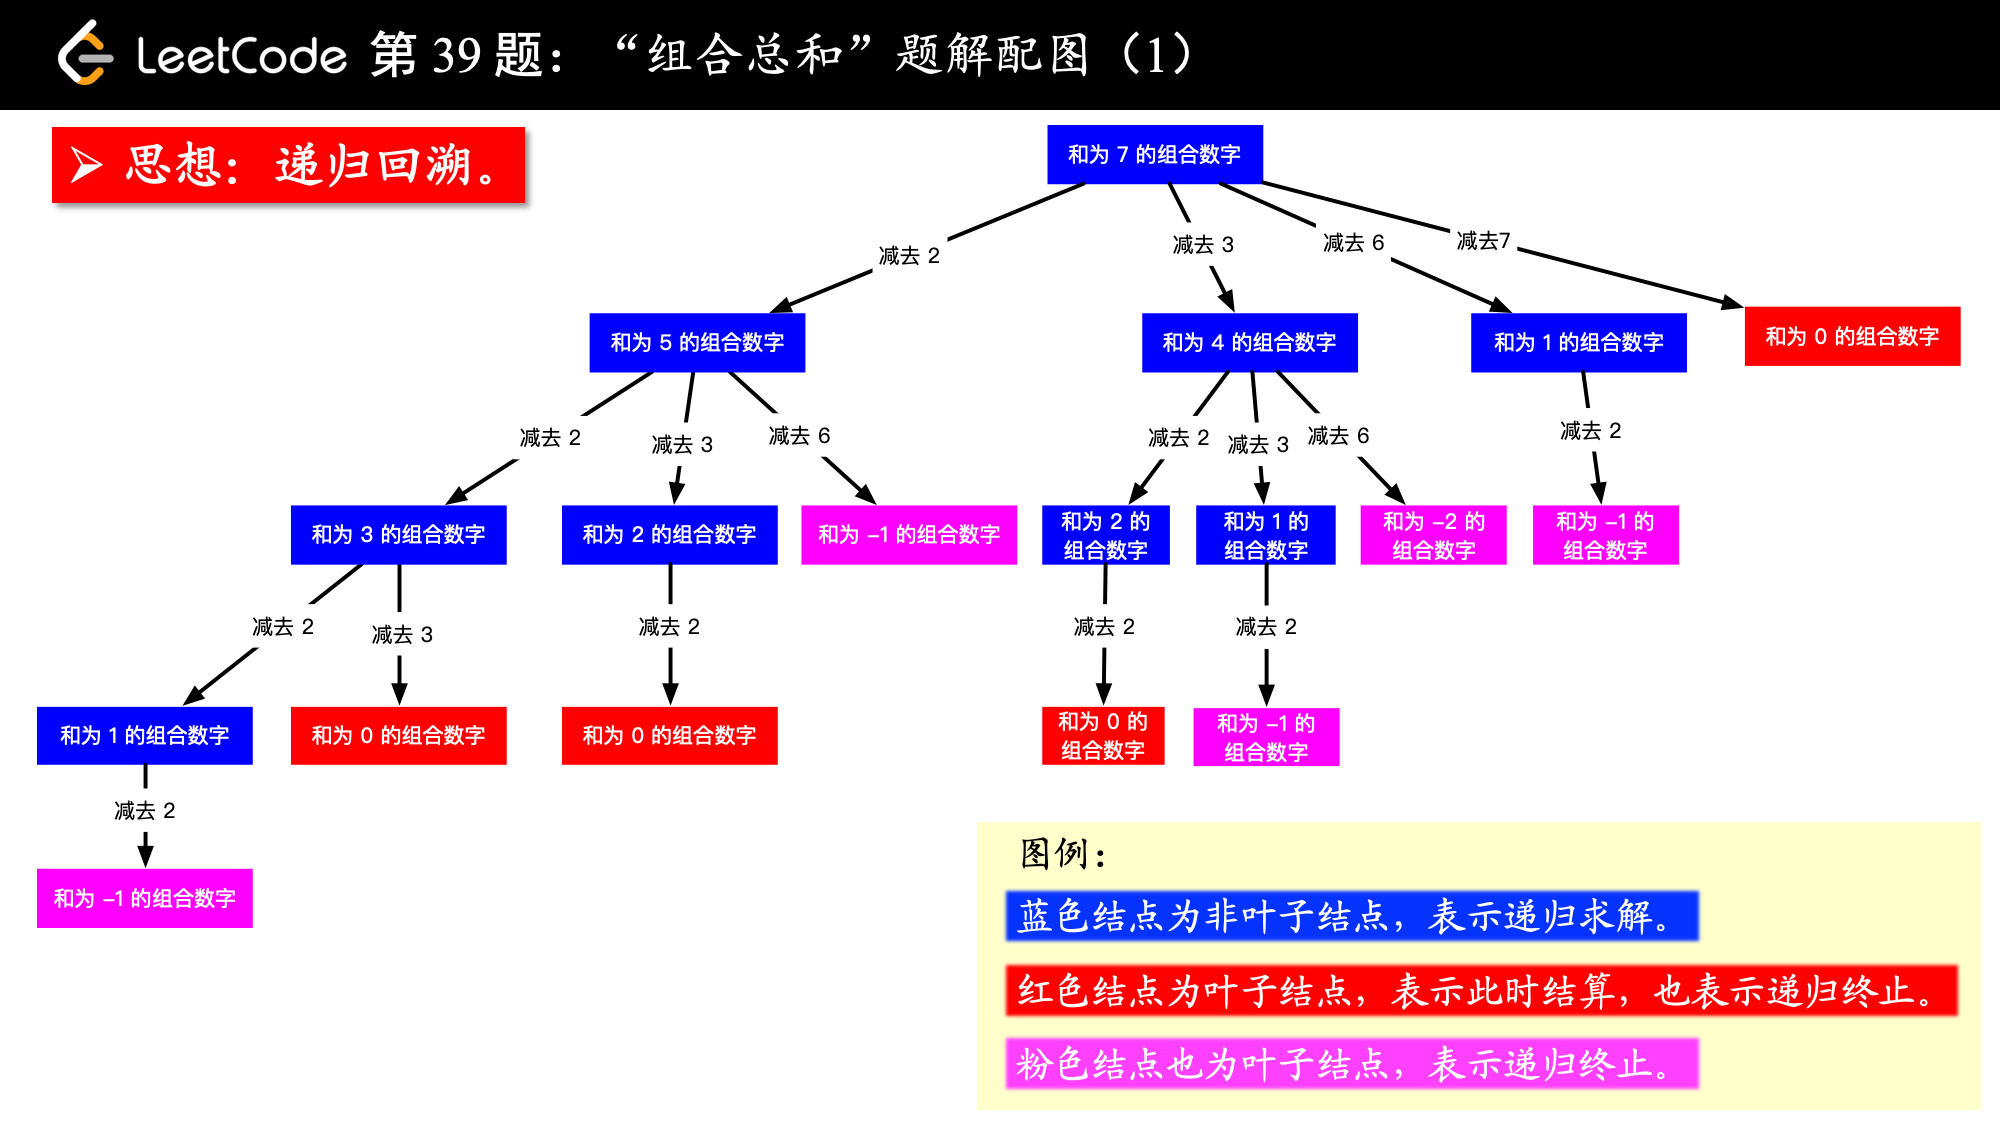
#### 说明：
* 蓝色结点表示：尝试找到组合之和为该数的所有组合，怎么找呢？逐个减掉候选数组中的元素即可；
* 以target=7为根结点，每一个分支做减法；
* 减到0或者负数的时候，到了叶子结点；
* 减到0的时候结算，这里“结算”的意思是添加到结果集；
* 从根结点到叶子结点（必须为0）的路径，就是题目要我们找的一个组合。

***如果这样编码的话，会发现提交不能通过，这是因为递归树画的有问题，下面看一下是什么原因。***
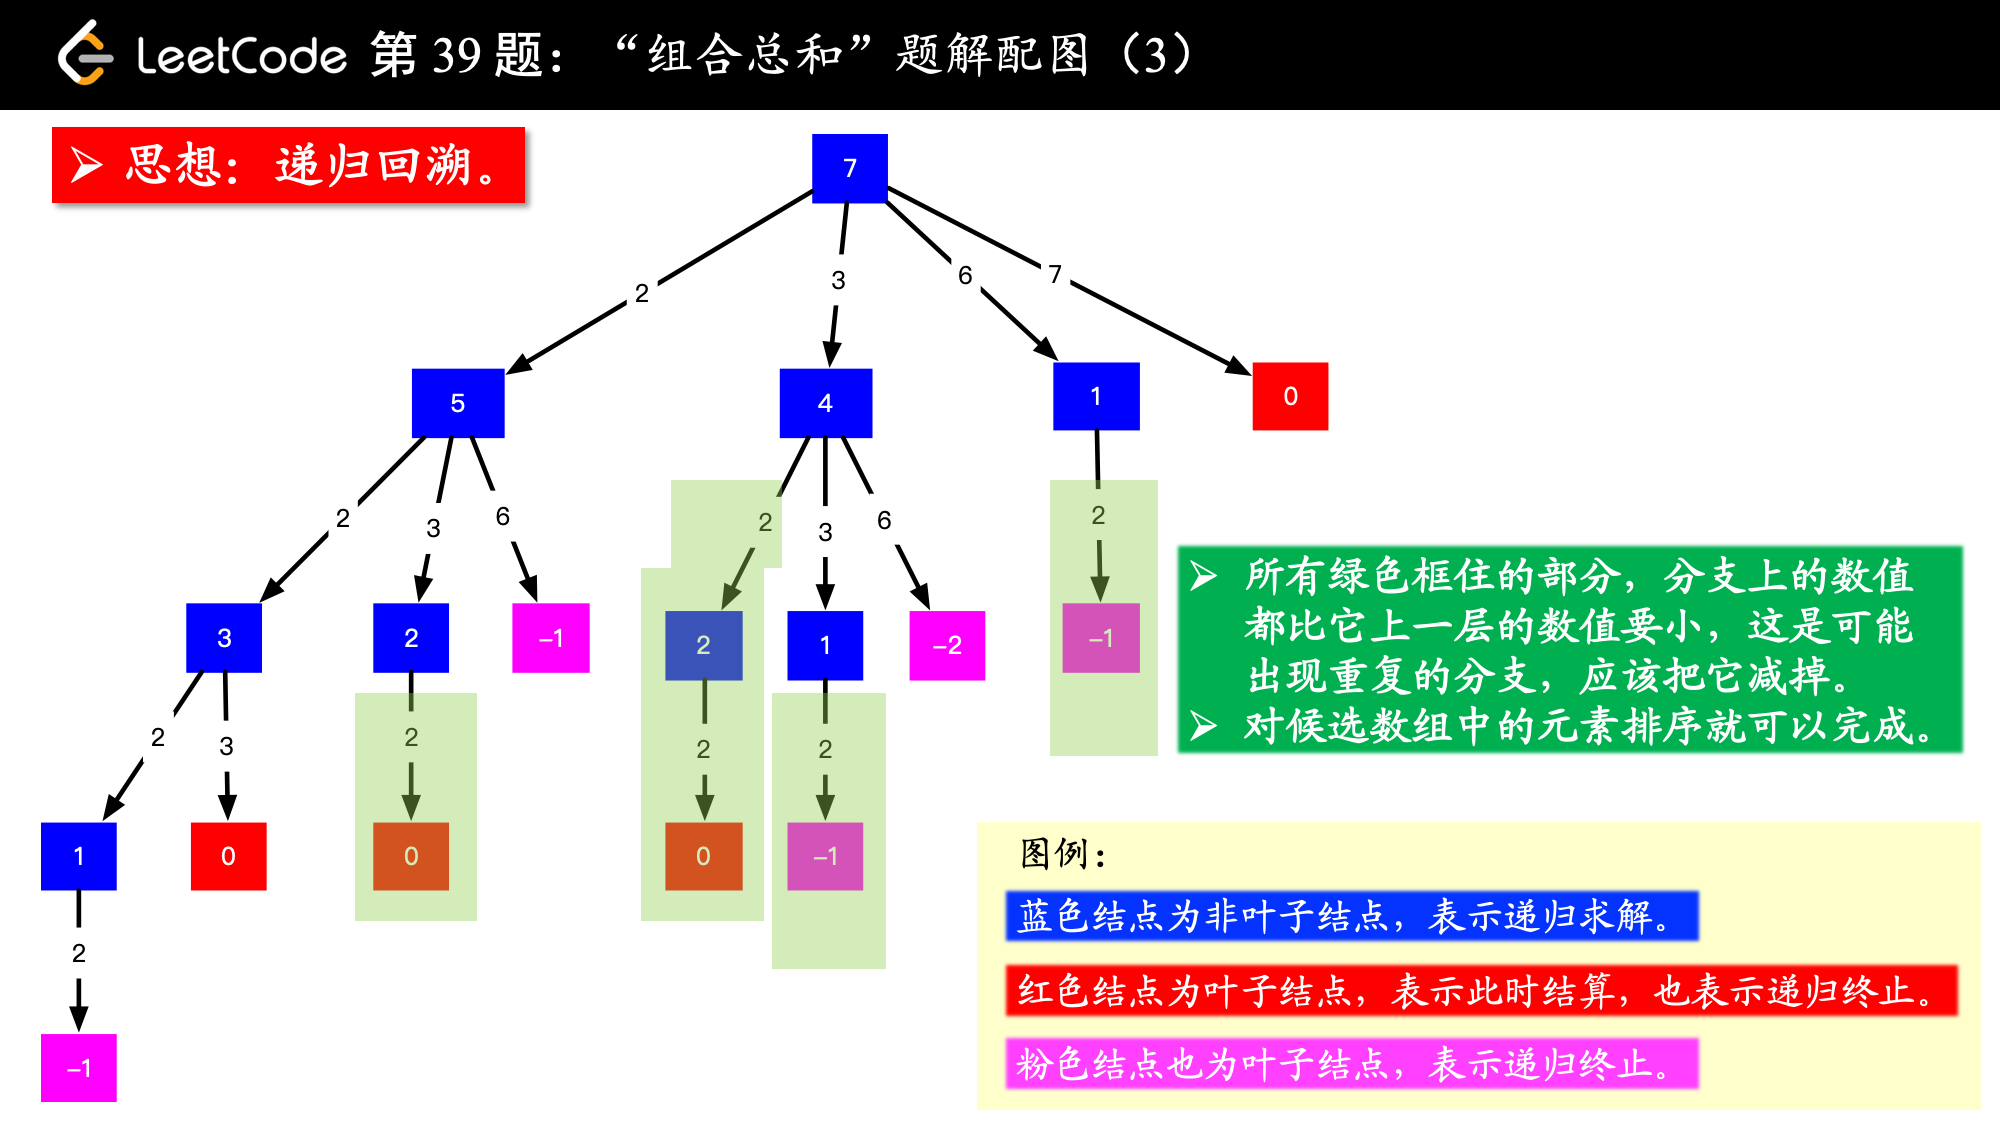
画出图以后，我看了一下，我这张图画出的结果有4个0，对应的路径是[[2, 2, 3], [2, 3, 2], [3, 2, 2], [7]]，而示例中的解集只有[[7], [2, 2, 3]]，很显然，重复的原因是**在较深层的结点值考虑了之前考虑过的元素，因此我们需要设置“下一轮搜索的起点”即可。**
### 去重复
* 在搜索的时候，需要设置搜索起点的下标 begin ，由于一个数可以使用多次，下一层的结点从这个搜索起点开始搜索；
* 在搜索起点 begin 之前的数因为以前的分支搜索过了，所以一定会产生重复。

### 剪枝提速
* 如果一个数位搜索起点都不能搜索到结果，那么比它还大的数肯定搜索不到结果，基于这个想法，我们可以对输入数组进行排序，以减少搜索的分支；
* 排序是为了提高搜索速度，非必要；
* 搜索问题一般复杂度较高，能剪枝就尽量需要剪枝。把候选数组排个序，遇到一个较大的数，如果以这个数为起点都搜索不到结果，后面的数就更搜索不到结果了。

In [27]:
from typing import List


class Solution:
    def combinationSum(self, candidates: List[int], target: int) -> List[List[int]]:
        size = len(candidates)
        if size == 0:
            return []

        # 剪枝是为了提速，在本题非必需
        candidates.sort()
        # 在遍历的过程中记录路径，它是一个栈
        path = []
        res = []
        # 注意要传入 size ，在 range 中， size 取不到
        self.__dfs(candidates, 0, size, path, res, target)
        return res

    def __dfs(self, candidates, begin, size, path, res, target):
        # 先写递归终止的情况
        if target == 0:
            # Python 中可变对象是引用传递，因此需要将当前 path 里的值拷贝出来
            # 或者使用 path.copy()
            res.append(path[:])
            return

        for index in range(begin, size):
            residue = target - candidates[index]
            # “剪枝”操作，不必递归到下一层，并且后面的分支也不必执行
            if residue < 0:
                break
            path.append(candidates[index])
            # 因为下一层不能比上一层还小，起始索引还从 index 开始（“去重复”操作）
            self.__dfs(candidates, index, size, path, res, residue)
            # 每次递归完成，进行一次回溯，把最新加的那个数删除
            path.pop()

In [29]:
candidates = [10,2,7,6,1,5]
target = 8
solution = Solution()
solution.combinationSum(candidates, target)

[[1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 2],
 [1, 1, 1, 1, 2, 2],
 [1, 1, 1, 5],
 [1, 1, 2, 2, 2],
 [1, 1, 6],
 [1, 2, 5],
 [1, 7],
 [2, 2, 2, 2],
 [2, 6]]

# 不可重复

**[LeetCode Link](https://leetcode-cn.com/problems/combination-sum-ii/solution/hui-su-suan-fa-jian-zhi-python-dai-ma-java-dai-m-3/)**

### 这道题与上一问的区别在于：
* 第 39 题：candidates 中的数字可以无限制重复被选取。
* 第 40 题：candidates 中的每个数字在每个组合中只能使用一次。

### 编码的不同在于下一层递归的起始索引不一样。
* 第 39 题：还从候选数组的当前索引值开始。
* 第 40 题：从候选数组的当前索引值的下一位开始。

**解释语句: if cur > begin and candidates[cur-1] == candidates[cur] 是如何避免重复的。**

这个方法最重要的作用是，可以让同一层级，不出现相同的元素。即
                  
                  1
                 / \
                2   2  这种情况不会发生 但是却允许了不同层级之间的重复即：
               /     \
              5       5
                例2
                  1
                 /
                2      这种情况确是允许的
               /
              2  
                
为何会有这种神奇的效果呢？
首先 cur-1 == cur 是用于判定当前元素是否和之前元素相同的语句。这个语句就能砍掉例1。
可是问题来了，如果把所有当前与之前一个元素相同的都砍掉，那么例二的情况也会消失。 
因为当第二个2出现的时候，他就和前一个2相同了。
                
那么如何保留例2呢？
那么就用cur > begin 来避免这种情况，你发现例1中的两个2是处在同一个层级上的，
例2的两个2是处在不同层级上的。
在一个for循环中，所有被遍历到的数都是属于一个层级的。我们要让一个层级中，
必须出现且只出现一个2，那么就放过第一个出现重复的2，但不放过后面出现的2。
第一个出现的2的特点就是 cur == begin. 第二个出现的2 特点是cur > begin.

In [24]:
class Solution:

    def combinationSum2(self, candidates: List[int], target: int) -> List[List[int]]:
        def dfs(begin, path, residue):
            if residue == 0:
                res.append(path[:])
                return

            for index in range(begin, size):
                if candidates[index] > residue:
                    break

                # 剪枝同一层级的重复，保留不同层级间的重复
                if index > begin and candidates[index - 1] == candidates[index]:
                    continue

                path.append(candidates[index])
                dfs(index + 1, path, residue - candidates[index])
                path.pop()

        size = len(candidates)
        if size == 0:
            return []

        candidates.sort()
        res = []
        dfs(0, [], target)
        return res

In [25]:
candidates = [10,1,2,7,6,1,5]
target = 8
solution = Solution()
solution.combinationSum2(candidates, target)

[[1, 1, 6], [1, 2, 5], [1, 7], [2, 6]]